In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## loading raw data

In [20]:
train = pd.read_csv('train_week5.csv',parse_dates= ["Date"])
countries = pd.read_csv('datasets_633569_1126788_Countries_usefulFeatures.csv')

In [21]:
countries.head()

,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO


In [24]:
countries.dtypes

Country_Region              object
Population_Size              int64
Tourism                      int64
Date_FirstFatality          object
Date_FirstConfirmedCase     object
Latitude                   float64
Longtitude                 float64
Mean_Age                   float64
Lockdown_Date               object
Lockdown_Type               object
Country_Code                object
dtype: object

In [11]:
train.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [25]:
train.dtypes

Id                         int64
County                    object
Province_State            object
Country_Region            object
Population                 int64
Weight                   float64
Date              datetime64[ns]
Target                    object
TargetValue                int64
dtype: object

In [28]:
all_df = pd.merge(train, countries, on='Country_Region', how='left')


In [29]:
all_df.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,37172386.0,14000.0,2020-03-23,2020-02-25,33.93911,67.709953,17.3,2020-03-24,Full,AFG
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,37172386.0,14000.0,2020-03-23,2020-02-25,33.93911,67.709953,17.3,2020-03-24,Full,AFG
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0,37172386.0,14000.0,2020-03-23,2020-02-25,33.93911,67.709953,17.3,2020-03-24,Full,AFG
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0,37172386.0,14000.0,2020-03-23,2020-02-25,33.93911,67.709953,17.3,2020-03-24,Full,AFG
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0,37172386.0,14000.0,2020-03-23,2020-02-25,33.93911,67.709953,17.3,2020-03-24,Full,AFG


In [30]:
train.isnull().sum()

Id                    0
County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [31]:
train.sort_values(by=['TargetValue'])

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
63464,63465,NaN,NaN,Spain,46438422,0.056646,2020-04-24,ConfirmedCases,-10034
35826,35827,NaN,NaN,France,66710000,0.055507,2020-06-04,ConfirmedCases,-2850
35754,35755,NaN,NaN,France,66710000,0.055507,2020-04-29,ConfirmedCases,-2512
35740,35741,NaN,NaN,France,66710000,0.055507,2020-04-22,ConfirmedCases,-2206
63527,63528,NaN,NaN,Spain,46438422,0.566455,2020-05-25,Fatalities,-1918
...,...,...,...,...,...,...,...,...,...
963064,963065,NaN,NaN,US,324141489,0.051029,2020-04-04,ConfirmedCases,33267
8936,8937,NaN,NaN,Brazil,206135893,0.052236,2020-05-30,ConfirmedCases,33274
963118,963119,NaN,NaN,US,324141489,0.051029,2020-05-01,ConfirmedCases,34037
963076,963077,NaN,NaN,US,324141489,0.051029,2020-04-10,ConfirmedCases,35098


In [16]:
train = train.drop(['County','Province_State','Country_Region','Target'],axis=1)
train

,Id,Population,Weight,Date,TargetValue
0,1,27657145,0.058359,2020-01-23,0
1,2,27657145,0.583587,2020-01-23,0
2,3,27657145,0.058359,2020-01-24,0
3,4,27657145,0.583587,2020-01-24,0
4,5,27657145,0.058359,2020-01-25,0
...,...,...,...,...,...
969635,969636,14240168,0.607106,2020-06-08,0
969636,969637,14240168,0.060711,2020-06-09,27
969637,969638,14240168,0.607106,2020-06-09,0
969638,969639,14240168,0.060711,2020-06-10,6


In [17]:
from sklearn.preprocessing import OrdinalEncoder

def create_features(df):
    df['day'] = df['Date'].dt.day
    df['month'] = df['Date'].dt.month
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['quarter'] = df['Date'].dt.quarter
    df['weekofyear'] = df['Date'].dt.weekofyear
    return df

In [33]:
train_df = create_features(all_df)
train_df

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Population_Size,...,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code,day,month,dayofweek,dayofyear,quarter,weekofyear
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,37172386.0,...,17.3,2020-03-24,Full,AFG,23,1,3,23,1,4
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,37172386.0,...,17.3,2020-03-24,Full,AFG,23,1,3,23,1,4
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0,37172386.0,...,17.3,2020-03-24,Full,AFG,24,1,4,24,1,4
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0,37172386.0,...,17.3,2020-03-24,Full,AFG,24,1,4,24,1,4
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0,37172386.0,...,17.3,2020-03-24,Full,AFG,25,1,5,25,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969635,969636,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0,14439018.0,...,19.0,2020-03-30,Full,ZWE,8,6,0,160,2,24
969636,969637,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27,14439018.0,...,19.0,2020-03-30,Full,ZWE,9,6,1,161,2,24
969637,969638,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0,14439018.0,...,19.0,2020-03-30,Full,ZWE,9,6,1,161,2,24
969638,969639,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6,14439018.0,...,19.0,2020-03-30,Full,ZWE,10,6,2,162,2,24


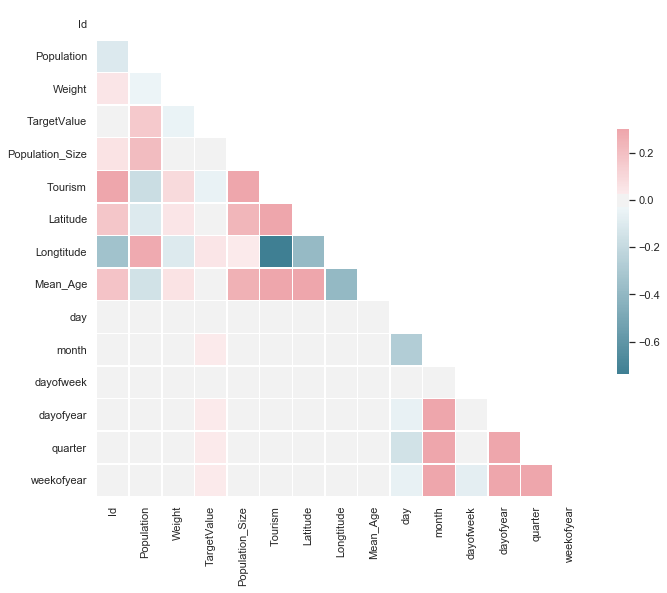

In [34]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})